In [1]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import math as ma
import seaborn as sns

from zipfile import ZipFile

## Data Visualization, v2, with the World Development Indicators #

### Exercise: Using Pandas, basic data cleaning, and/or other necessary functions and attributes, come up with a smaller dataset out of the World Development Indicators, for use in regression software and in your research.

In [2]:
DATA_DIR = '/Users/dino/Desktop/2022-Intersession/ECON197/datasets/'

WDI = pd.read_csv(DATA_DIR + "WDI/WDIData.csv")

WDI

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.936004,17.337896,17.687093,18.140971,18.491344,18.825520,19.272212,19.628009,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.499471,6.680066,6.859110,7.016238,7.180364,7.322294,7.517191,7.651598,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,37.855399,38.046781,38.326255,38.468426,38.670044,38.722783,38.927016,39.042839,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.794160,32.001027,33.871910,38.880173,40.261358,43.061877,44.270860,45.803485,NaN,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.663502,17.633986,16.464681,24.531436,25.345111,27.449908,29.641760,30.404935,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383567,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,14.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383568,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.700000,NaN,NaN,NaN,5.418352,NaN,NaN,NaN
383569,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,33.500000,32.400000,NaN,NaN,NaN,33.658057,NaN,NaN,NaN
383570,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,59.200000,59.400000,59.500000,59.700000,59.900000,60.000000,60.200000,60.400000,NaN,NaN


In [3]:
#FULL LIST
country_codes = WDI['Country Code'].unique()
#country_codes

#np.set_printoptions(threshold=np.size(indicators))
country_codes

array(['AFE', 'AFW', 'ARB', 'CSS', 'CEB', 'EAR', 'EAS', 'EAP', 'TEA',
       'EMU', 'ECS', 'ECA', 'TEC', 'EUU', 'FCS', 'HPC', 'HIC', 'IBD',
       'IBT', 'IDB', 'IDX', 'IDA', 'LTE', 'LCN', 'LAC', 'TLA', 'LDC',
       'LMY', 'LIC', 'LMC', 'MEA', 'MNA', 'TMN', 'MIC', 'NAC', 'INX',
       'OED', 'OSS', 'PSS', 'PST', 'PRE', 'SST', 'SAS', 'TSA', 'SSF',
       'SSA', 'TSS', 'UMC', 'WLD', 'AFG', 'ALB', 'DZA', 'ASM', 'AND',
       'AGO', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS',
       'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN',
       'BOL', 'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI',
       'CPV', 'KHM', 'CMR', 'CAN', 'CYM', 'CAF', 'TCD', 'CHI', 'CHL',
       'CHN', 'COL', 'COM', 'COD', 'COG', 'CRI', 'CIV', 'HRV', 'CUB',
       'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY',
       'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FRO', 'FJI', 'FIN',
       'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC',
       'GRL', 'GRD',

In [4]:
#FULL LIST
indicators = WDI['Indicator Name'].unique()
#indicators

#np.set_printoptions(threshold=np.size(indicators))
indicators

array(['Access to clean fuels and technologies for cooking (% of population)',
       'Access to clean fuels and technologies for cooking, rural (% of rural population)',
       'Access to clean fuels and technologies for cooking, urban (% of urban population)',
       ...,
       'Women who were first married by age 18 (% of women ages 20-24)',
       "Women's share of population ages 15+ living with HIV (%)",
       'Young people (ages 15-24) newly infected with HIV'], dtype=object)

In [5]:
#STEP1: PICK COUNTRIES

df = WDI.loc[(WDI['Country Code'] == 'PHL') ]
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
294168,Philippines,PHL,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,40.900000,42.000000,42.200000,43.300000,44.10000,45.400000,46.500000,48.000000,NaN,NaN
294169,Philippines,PHL,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,21.900000,22.200000,22.600000,23.800000,24.70000,25.700000,26.400000,27.700000,NaN,NaN
294170,Philippines,PHL,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,62.200000,62.800000,63.800000,64.700000,66.20000,66.800000,68.100000,69.300000,NaN,NaN
294171,Philippines,PHL,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,87.500000,89.720367,89.080002,92.066505,93.00000,94.448265,95.645081,96.842384,NaN,NaN
294172,Philippines,PHL,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.899696,84.572128,83.194977,88.138664,90.02317,91.826210,93.700127,95.587868,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295605,Philippines,PHL,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.600000,NaN,NaN,NaN,1.30000,NaN,NaN,NaN,NaN,NaN
295606,Philippines,PHL,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,2.20000,NaN,NaN,NaN,NaN,NaN
295607,Philippines,PHL,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,15.000000,NaN,NaN,NaN,16.50000,NaN,NaN,NaN,NaN,NaN
295608,Philippines,PHL,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.200000,6.100000,6.100000,6.200000,6.20000,6.200000,6.200000,6.200000,NaN,NaN


In [6]:
#STEP2: PICK INDICATORS

df2 = df.loc[(df['Indicator Name'] == 'Gross capital formation (constant LCU)') | \
              (df['Indicator Name'] == 'Final consumption expenditure (constant LCU)') | \
              (df['Indicator Name'] == 'Trade (% of GDP)') | \
              (df['Indicator Name'] == 'GDP (constant LCU)')]

df2   

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
294594,Philippines,PHL,Final consumption expenditure (constant LCU),NE.CON.TOTL.KN,1.320046e+12,1.385880e+12,1.461254e+12,1.551005e+12,1.613135e+12,1.691156e+12,...,1.128896e+13,1.190980e+13,1.270000e+13,1.364483e+13,1.446771e+13,1.544972e+13,1.642732e+13,1.556323e+13,1.629649e+13,NaN
294633,Philippines,PHL,GDP (constant LCU),NY.GDP.MKTP.KN,1.533325e+12,1.620655e+12,1.699197e+12,1.818417e+12,1.880289e+12,1.980792e+12,...,1.325464e+13,1.409605e+13,1.499091e+13,1.606268e+13,1.717598e+13,1.826519e+13,1.938275e+13,1.753784e+13,1.853805e+13,NaN
294691,Philippines,PHL,Gross capital formation (constant LCU),NE.GDI.TOTL.KN,2.505581e+11,2.909014e+11,2.891962e+11,3.409288e+11,3.768582e+11,4.001631e+11,...,2.709183e+12,2.933448e+12,3.326756e+12,4.018375e+12,4.456328e+12,4.959105e+12,5.132349e+12,3.375833e+12,4.060997e+12,NaN
295525,Philippines,PHL,Trade (% of GDP),NE.TRD.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.582478e+01,5.746817e+01,5.914159e+01,6.177607e+01,6.816837e+01,7.216340e+01,6.884184e+01,5.816956e+01,6.350157e+01,NaN


In [7]:
#STEP3: TRANSPOSE AND PICK TIME FRAME

df3 = df2.transpose()

df3 = df3.rename(columns=(df3.iloc[1]+ "_" +df3.iloc[2])).iloc[54:66,]

df3 = df3.rename(columns={'PHL_Final consumption expenditure (constant LCU)':'PH_Consumption',\
                          'PHL_GDP (constant LCU)':'PH_Real_GDP',\
                          'PHL_Gross capital formation (constant LCU)':'PH_Investment'},inplace=False)

df3 = df3.rename_axis("Year", axis='rows').rename_axis("Indicators", axis='columns')

df3

Indicators,PH_Consumption,PH_Real_GDP,PH_Investment,PHL_Trade (% of GDP)
Year,,,,
2010,9420980396200.0,11183860996500.0,2226120831900.0,66.104279
2011,9900075092800.0,11615360392900.0,2169604419400.0,60.795837
2012,10679965569600.0,12416466190200.0,2287334967800.0,57.842006
2013,11288960041800.0,13254643626900.0,2709182905300.0,55.824781
2014,11909801542400.0,14096046745200.0,2933448470700.0,57.468172
2015,12699997073200.0,14990907450400.0,3326756400100.0,59.141592
2016,13644828286900.0,16062675895000.0,4018374754900.0,61.776066
2017,14467707775600.0,17175978086100.0,4456327663100.0,68.16837
2018,15449721777600.0,18265190258200.0,4959105466100.0,72.163398


In [8]:
#SAVE FILE TO WORKING DIRECTORY
#Don't forget to check your working directory before doing this, 
#use the guide in Notebook 3-5 or alternatively, just put the entire path below.

df3.to_csv('PHL_DataViz_1990-2021.csv')

### DATA VISUALS: MATPLOTLIB basics ###

In [9]:
df3

Indicators,PH_Consumption,PH_Real_GDP,PH_Investment,PHL_Trade (% of GDP)
Year,,,,
2010,9420980396200.0,11183860996500.0,2226120831900.0,66.104279
2011,9900075092800.0,11615360392900.0,2169604419400.0,60.795837
2012,10679965569600.0,12416466190200.0,2287334967800.0,57.842006
2013,11288960041800.0,13254643626900.0,2709182905300.0,55.824781
2014,11909801542400.0,14096046745200.0,2933448470700.0,57.468172
2015,12699997073200.0,14990907450400.0,3326756400100.0,59.141592
2016,13644828286900.0,16062675895000.0,4018374754900.0,61.776066
2017,14467707775600.0,17175978086100.0,4456327663100.0,68.16837
2018,15449721777600.0,18265190258200.0,4959105466100.0,72.163398


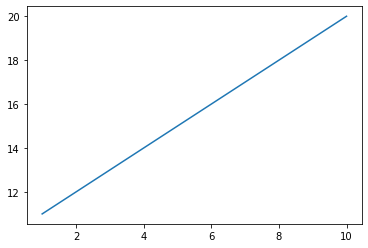

In [10]:
#Practice basics
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

plt.plot(x,y)


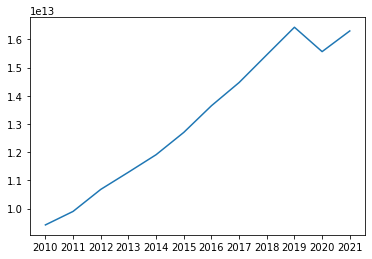

In [11]:
#basic plot with df


plt.plot(df3.index,df3.PH_Consumption)

### SEABORN basics ###

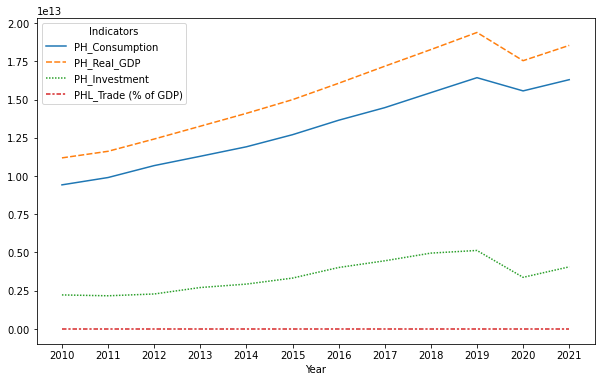

In [12]:
#Set Figure
plt.figure(figsize=(10,6))

#Basic Line Plot
g = sns.lineplot(data=df3)

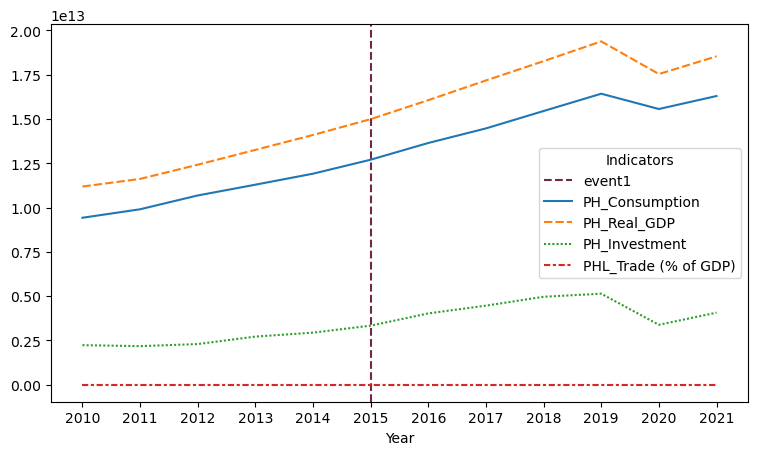

In [13]:
fig = plt.figure(figsize=(9,5), dpi=100)

#Axes object with axis
ax = fig.add_subplot(111)

plt.axvline(x=5, color='#70284a', linestyle='--', label='event1')
sns.lineplot(data=df3)
plt.show()

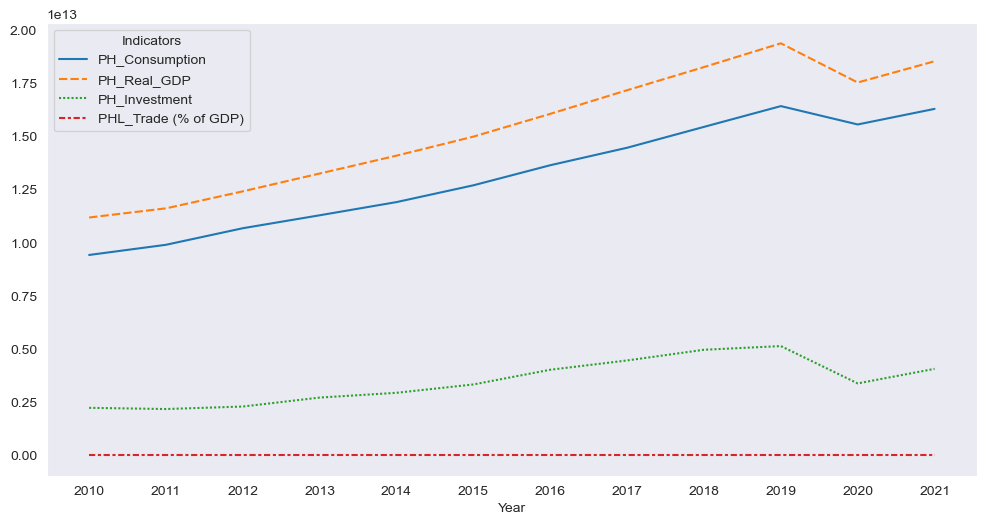

In [14]:
# Change the style of the figure
sns.set_style("dark")

fig = plt.figure(figsize=(12,6), dpi=100)
ax = fig.add_subplot(111)
ax = sns.lineplot(data=df3,ax=ax)


# Line chart 
plt.show()


### Plotting multiple figures at once

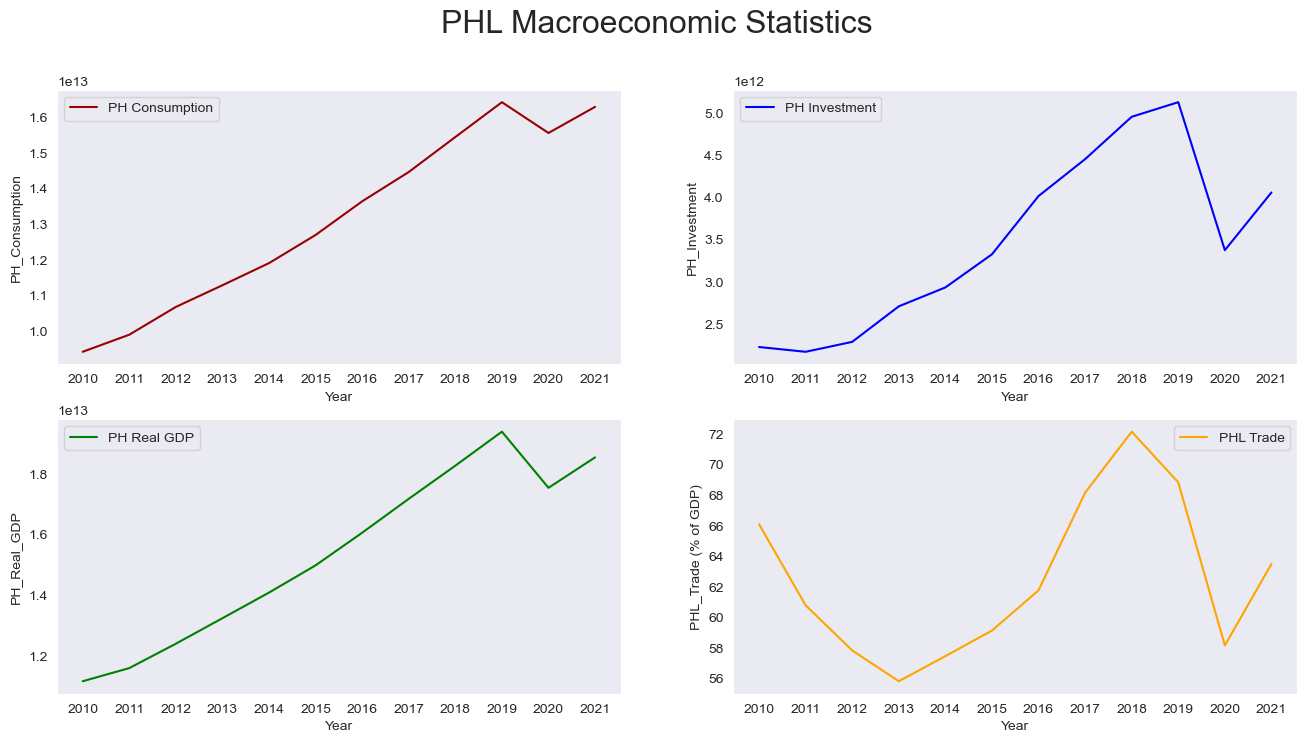

In [15]:
fig, ax = plt.subplots(figsize=(16,8), ncols=2, nrows=2, dpi=100)

ax[0][0] = sns.lineplot(data=df3['PH_Consumption'], label="PH Consumption",ax=ax[0][0],color='#990000')
ax[0][1] = sns.lineplot(data=df3['PH_Investment'], label="PH Investment", ax=ax[0][1],color='blue')
ax[1][0] = sns.lineplot(data=df3['PH_Real_GDP'], label="PH Real GDP",ax=ax[1][0],color='green')
ax[1][1] = sns.lineplot(data=df3['PHL_Trade (% of GDP)'], label="PHL Trade",ax=ax[1][1],color='orange')

#Super Title
#fig.subplots_adjust(top=.9)
fig.suptitle('PHL Macroeconomic Statistics',fontsize=23)

fig.savefig("PHL_Macro.png")
plt.show()